In [14]:
import numpy as np

In [15]:
import tensorflow as tf

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [47]:
tf.test.gpu_device_name()

'/device:GPU:0'

# one-hot encoding

In [2]:
samples=['The cat sat on the mat.','The dog ate my homework.']
token_index={}

In [3]:
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1  # word as key, index as value, start from 1 instead from 0

In [4]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [5]:
token_index['ate']

8

In [6]:
max_length = 10 # only read 10 words in each sample 
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1)) # 

In [7]:
results.shape

(2, 10, 11)

In [8]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]: # only read first 10 words in each sample
        index=token_index.get(word)
        results[i, j, index] = 1 # mark as 1, if appear in this position

In [9]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

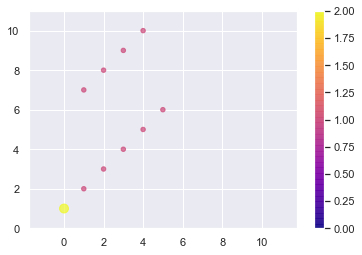

In [12]:
x=np.arange(10)
y=np.arange(0,11)
x, y = np.meshgrid(x, y)
#results[0][0,1]
#plt.contourf(x,y,z=results[0][x,y])
r= results[0]+results[1]
plt.scatter(x,y,s=20*r[x,y]**2, c=r[x,y], cmap='plasma', alpha=0.7)
#plt.scatter(x,y,s=results[1][x,y],cmap='viridis', alpha=0.3)
ax=plt.gca() 
ax.axis('equal')
plt.xlim(0,10)
plt.ylim(0,11)
plt.colorbar()

In [13]:
import string

In [14]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

### Keras built-in one-hot encoding

In [15]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [18]:
tokenizer = Tokenizer(num_words=1000) # num_words: the maximum number of words to keep, based on word frequency.

In [20]:
tokenizer.fit_on_texts(samples) # Updates internal vocabulary based on a list of texts.

In [22]:
tokenizer.word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [24]:
sequences=tokenizer.texts_to_sequences(samples) #Transforms each text in texts to a sequence of integers.
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [32]:
one_hot_results= tokenizer.texts_to_matrix(samples, mode='binary')
print(one_hot_results[0][:10])

[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


In [26]:
one_hot_results_count= tokenizer.texts_to_matrix(samples, mode='count')
one_hot_results_count

array([[0., 2., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [27]:
print(one_hot_results_count[0][:10])

[0. 2. 1. 1. 1. 1. 0. 0. 0. 0.]


### Word Embeddings

In [ ]:
# dense word vectors
# keep the 'semantic' relationship between words, like human memory
# ex: king + female --> queen

In [2]:
from keras.layers import Embedding

Using TensorFlow backend.


In [3]:
embedding_layer = Embedding(1000, 64) # input_dim, output_dim

In [4]:
from keras.datasets import imdb
from keras import preprocessing

In [5]:
max_features = 1000 # only 1000 words consider as features
maxlen = 20 # cuts off the text after 20 words

In [6]:
# max number of words to include. 
# Words are ranked by how often they occur 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 

In [7]:
# the length of articles are different
print(len(x_train[0]))
print(len(x_train[1]))

218
189


In [8]:
# Pads sequences to the same length.
x_train=preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [9]:
print(len(x_train[0]))
print(len(x_train[1]))

20
20


In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

In [11]:
model=Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten()) # 3D -> 2D
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
             metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

C:\Users\shyngjong\anaconda3\envs\python_36_tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 332us/step - loss: 0.6727 - acc: 0.6158 - val_loss: 0.6338 - val_acc: 0.6754
Epoch 2/10
20000/20000 [==============================] - 3s 162us/step - loss: 0.5687 - acc: 0.7268 - val_loss: 0.5524 - val_acc: 0.7128
Epoch 3/10
20000/20000 [==============================] - 3s 162us/step - loss: 0.5097 - acc: 0.7514 - val_loss: 0.5332 - val_acc: 0.7196
Epoch 4/10
20000/20000 [==============================] - 3s 160us/step - loss: 0.4877 - acc: 0.7617 - val_loss: 0.5297 - val_acc: 0.7260
Epoch 5/10
20000/20000 [==============================] - 3s 156us/step - loss: 0.4752 - acc: 0.7702 - val_loss: 0.5303 - val_acc: 0.7280
Epoch 6/10
20000/20000 [==============================] - 3s 158us/step - loss: 0.4662 - acc: 0.7741 - val_loss: 0.5334 - val_acc: 0.7298
Epoch 7/10
20000/20000 [==============================] - 3s 156us/step - loss: 0.4576 - acc: 0.7810 - val_loss: 0.5383 - v

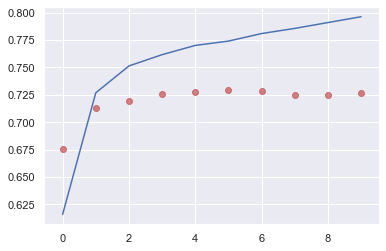

In [17]:
epoch = history.epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epoch, acc)
plt.scatter(epoch,val_acc, c='r', alpha=0.7)

In [19]:
# Saves the model to a single HDF5 file
model.save('imdb_embedding.model') 

# RNN

In [3]:
timesteps=100
input_features=32
output_features=64
inputs=np.random.random((timesteps, input_features))

In [4]:
inputs.shape

(100, 32)

In [5]:
state_t=np.zeros((output_features,))

In [6]:
state_t.shape

(64,)

In [7]:
W=np.random.random((output_features, input_features))
U=np.random.random((output_features, output_features))
b=np.random.random((output_features,))

In [8]:
print(W)

[[0.78925312 0.83225641 0.59165042 ... 0.87492466 0.55965291 0.82204601]
 [0.34916952 0.52239971 0.19556718 ... 0.95619772 0.29955488 0.95770622]
 [0.42100457 0.34162977 0.96641425 ... 0.88497431 0.81198443 0.39389296]
 ...
 [0.74704046 0.8448289  0.03310403 ... 0.90602959 0.03976432 0.85780849]
 [0.05390123 0.24688893 0.97221708 ... 0.06558631 0.5876637  0.01688038]
 [0.35648463 0.78288225 0.05774365 ... 0.680147   0.09981427 0.72869581]]


In [9]:
successive_outputs=[]

In [10]:
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t)+ np.dot(U, state_t) + b) #Compute hyperbolic tangent element-wise
    #print(output_t)
    successive_outputs.append(output_t) #store current state
    state_t = output_t # update the state for next step

### keras SimpleRNN

In [25]:
from keras.datasets import imdb
from keras.layers import SimpleRNN, Flatten, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing import sequence

In [26]:
max_features=10000
maxlen=500
batch_size=32
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
x_train=preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [27]:
model=Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
             metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [28]:
history=model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

C:\Users\shyngjong\anaconda3\envs\python_36_tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.5688 - acc: 0.6991 - val_loss: 0.5041 - val_acc: 0.7646
Epoch 2/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.3590 - acc: 0.8528 - val_loss: 0.3899 - val_acc: 0.8244
Epoch 3/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2739 - acc: 0.8916 - val_loss: 0.3380 - val_acc: 0.8714
Epoch 4/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.2302 - acc: 0.9104 - val_loss: 0.3281 - val_acc: 0.8756
Epoch 5/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1949 - acc: 0.9272 - val_loss: 0.4852 - val_acc: 0.8392
Epoch 6/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1524 - acc: 0.9458 - val_loss: 0.3553 - val_acc: 0.8600
Epoch 7/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1211 - acc: 0.9571 - val_loss: 0.3815 - val_acc:

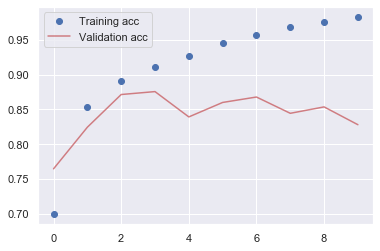

In [32]:
epoch = history.epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epoch, acc, 'bo')
plt.plot(epoch, val_acc, 'b', c='r', alpha=0.7)
plt.legend(['Training acc','Validation acc'])

In [33]:
model.save('imdb_small_rnn_500_word.model') 

# LSTM (long short-term memory)

1. "as a human, it shouldn't be your job to understand it."
2. "all past information to be reinjected at a later time, thus fighting the vanishing-gradient problem." (p.204)

In [34]:
from keras.layers import LSTM

In [35]:
model=Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32)) # use LSTM
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
             metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [36]:
history=model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

C:\Users\shyngjong\anaconda3\envs\python_36_tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 116s 6ms/step - loss: 0.5117 - acc: 0.7575 - val_loss: 0.3970 - val_acc: 0.8266
Epoch 2/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.2910 - acc: 0.8855 - val_loss: 0.2798 - val_acc: 0.8858
Epoch 3/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.2315 - acc: 0.9144 - val_loss: 0.3601 - val_acc: 0.8410
Epoch 4/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.2011 - acc: 0.9262 - val_loss: 0.3027 - val_acc: 0.8704
Epoch 5/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1797 - acc: 0.9331 - val_loss: 0.4542 - val_acc: 0.8640
Epoch 6/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1612 - acc: 0.9424 - val_loss: 0.3241 - val_acc: 0.8908
Epoch 7/10
20000/20000 [==============================] - 115s 6ms/step - loss: 0.1442 - acc: 0.9491 - val_loss: 0.3615 - v

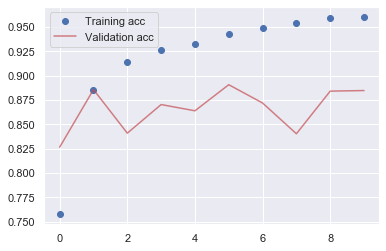

In [37]:
epoch = history.epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epoch, acc, 'bo')
plt.plot(epoch, val_acc, 'b', c='r', alpha=0.7)
plt.legend(['Training acc','Validation acc'])

In [38]:
np.average(val_acc) # a little better than RNN

0.8660000026226043

In [39]:
model.save('imdb_LSTM.model') 